In [1]:
import numpy as np
import pandas as pd
import string, re
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
#import datetime as dt
import talib
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import warnings
warnings.filterwarnings('ignore')

In [32]:
#dfo=pd.read_excel('apple_all_dec7.xlsx')
#dfo=pd.read_excel('Amazonall1.xlsx')
dfo=pd.read_excel('microsoft_all_dec10.xlsx')
print('Columns are:\n',dfo.columns)
print('\n Original data with all Tweets',dfo.shape)
dfo.head(2)

Columns are:
 Index(['Text', 'DateTime', 'Language'], dtype='object')

 Original data with all Tweets (174310, 3)


,Text,DateTime,Language
0,@QOTD: Buy Microsoft stock immediately. Sell a...,2007-01-30 18:48:52,en
1,"OK, I went and did it - I invested in Yahoo. A...",2007-04-20 16:46:24,en


In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
sa = SentimentIntensityAnalyzer()

In [34]:
stop_list = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def preprocess(tweet):
    if type(tweet)!=type(2.0):
        #tweet = tweet.lower()
        tweet = " ".join(tweet.split('#'))
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
        tweet = re.sub('((www\.[^\s]+)|(https://[^\s]+))','URL',tweet)
        tweet = re.sub("http\S+", "URL", tweet)
        tweet = re.sub("https\S+", "URL", tweet)
        tweet = re.sub('@[^\s]+','AT_USER',tweet)
        #tweet = tweet.replace("AT_USER","")
        tweet = tweet.replace("URL","")
        tweet = tweet.replace(".","")
        tweet = tweet.replace('\"',"")
        #tweet = tweet.replace('&amp',"")
        tweet  = " ".join([word for word in tweet.split(" ") if word not in stop_list])
        tweet  = " ".join([word for word in tweet.split(" ") if re.search('^[a-z]+$', word)])
        tweet = " ".join([lemmatizer.lemmatize(word) for word in tweet.split(" ")])
        tweet = re.sub('[\s]+', ' ', tweet)
        tweet = tweet.strip('\'"')
    else:
        tweet=''
    return tweet

In [48]:
dfo['Text'] = dfo['Text'].astype(object)
dfo['Text'] =dfo.Text.str.lower()
dfo['Processed_text']=dfo.Text.apply(preprocess)
dfo=dfo[dfo['Processed_text'].apply(lambda x: len(x.split(' ')) > 3)]

In [49]:
pos=dfo['Processed_text'].apply(lambda text: sa.polarity_scores(text)['pos'])
neu=dfo['Processed_text'].apply(lambda text: sa.polarity_scores(text)['neu'])
neg=dfo['Processed_text'].apply(lambda text: sa.polarity_scores(text)['neg'])
com=dfo['Processed_text'].apply(lambda text: sa.polarity_scores(text)['compound'])

In [50]:
print('original',len(dfo))
print('Positive',len(pos))
print('Negative',len(neg))
print('Neutral',len(neu))
print('Compound',len(com))

original 87212
Positive 87212
Negative 87212
Neutral 87212
Compound 87212


In [51]:
dfo['Positive']=pos
dfo['Negative']=neg
dfo['Neutral']=neu
dfo['Compound']=com

In [39]:
com1=com[com<0]
com2=com[com>0.2]
len(com1), len(com2)

(20688, 64013)

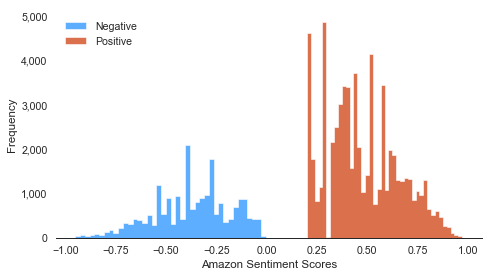

In [52]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  
plt.figure(figsize=(7,4))
ax = plt.subplot(111)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
labels=['Negative','Positive']
kwargs = dict(histtype='stepfilled', alpha=0.7, density=0, bins=40)
ax=plt.hist(com1, **kwargs,color='#1a8cff');

ax=plt.hist(com2, **kwargs, color='#cc3300');
plt.xlabel('Amazon Sentiment Scores')
plt.ylabel('Frequency')

plt.legend(labels, frameon=False)
sns.despine(left=True)
plt.tight_layout()
plt.savefig('Tesla.png', bbox_inches='tight', dpi=400)

In [53]:
dfo.head(2)

,Text,DateTime,Processed_text,Positive,Negative,Neutral,Compound
0,also thinking pocket tesla must be a tad uncom...,2007-01-15 11:50:07,also thinking pocket tesla must tad uncomforta...,0.0,0.271,0.729,-0.3818
1,"nah, i just warp spacetime with a pocket tesla...",2007-01-15 11:45:41,warp spacetime pocket tesla device got firebox...,0.0,0.000,1.000,0.0000


In [54]:
dfo=dfo.loc[:,['DateTime','Positive','Negative','Neutral','Compound']]

In [55]:
dfo.head()

,DateTime,Positive,Negative,Neutral,Compound
0,2007-01-15 11:50:07,0.000,0.271,0.729,-0.3818
1,2007-01-15 11:45:41,0.000,0.000,1.000,0.0000
2,2007-01-31 05:59:14,0.000,0.000,1.000,0.0000
3,2007-01-31 05:58:06,0.213,0.000,0.787,0.2263
4,2007-02-08 21:59:32,0.302,0.000,0.698,0.0772


In [56]:
#dfo.to_csv('AMZN_Vade.csv')
#dfo.to_csv('AAPL_Vade.csv')
#dfo.to_csv('MSFT_Vade.csv')
dfo.to_csv('TESLA_Vade.csv')

## For Tesla Only

In [45]:
dfo=pd.read_excel('tesla_all_mar10.xlsx')
dfo['Text1']=dfo.Text
dfo['Text1'] = dfo['Text1'].astype(object)
dfo['Text1'] =dfo.Text.str.lower()
print(dfo.shape)
dfo.head()

(117086, 3)


,Text,DateTime,Text1
0,also thinking pocket tesla must be a tad uncom...,2007-01-15 11:50:07,also thinking pocket tesla must be a tad uncom...
1,"nah, i just warp spacetime with a pocket tesla...",2007-01-15 11:45:41,"nah, i just warp spacetime with a pocket tesla..."
2,Noting that Arlo can get Tesla off the iTunes ...,2007-01-31 05:59:14,noting that arlo can get tesla off the itunes ...
3,Wishing I could get a Tesla without waiting a ...,2007-01-31 05:58:06,wishing i could get a tesla without waiting a ...
4,I want the Tesla Motors car,2007-02-08 21:59:32,i want the tesla motors car


In [46]:
#df1 = dfo[~dfo['Text1'].isin(['nikola','girls','coil','song'])]
dfo=dfo[~dfo.Text1.str.contains("nikola", na=False)]
dfo=dfo[~dfo.Text1.str.contains("girls", na=False)]
dfo=dfo[~dfo.Text1.str.contains("song", na=False)]
dfo=dfo[~dfo.Text1.str.contains("sing", na=False)]
dfo=dfo[~dfo.Text1.str.contains("coil", na=False)]
dfo=dfo[~dfo.Text1.str.contains("nicola", na=False)]
dfo=dfo.loc[:,['Text','DateTime']]
dfo.shape

(100300, 2)

In [47]:
dfo.head(3)

,Text,DateTime
0,also thinking pocket tesla must be a tad uncom...,2007-01-15 11:50:07
1,"nah, i just warp spacetime with a pocket tesla...",2007-01-15 11:45:41
2,Noting that Arlo can get Tesla off the iTunes ...,2007-01-31 05:59:14
